Found 624 images belonging to 2 classes.


C:\Users\vikne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 539ms/step - accuracy: 0.0969 - loss: 2.8215
Test accuracy: 0.09455128014087677
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 531ms/step
Confusion Matrix:
[[ 28 206]
 [359  31]]
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.07      0.12      0.09       234
   PNEUMONIA       0.13      0.08      0.10       390

    accuracy                           0.09       624
   macro avg       0.10      0.10      0.09       624
weighted avg       0.11      0.09      0.10       624



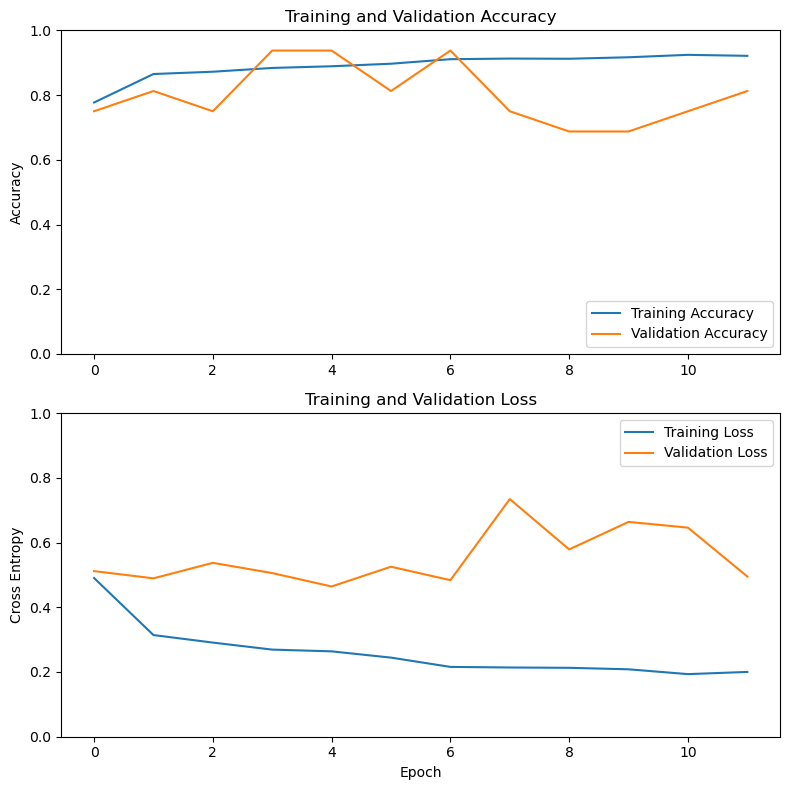

In [13]:
# Import des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Charger le modèle entraîné
model = load_model('cnn_tuned_model.h5')

# Charger l'historique de l'entraînement
history = np.load('tuned_training_history.npy', allow_pickle=True).item()

# Charger les données de test avec color_mode='grayscale'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '../../chest_xray/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',  # Spécifiez que les images sont en niveaux de gris
    shuffle=False
)

# Évaluer le modèle sur les données de test
test_loss, test_acc = model.evaluate(test_generator)

print(f'Test accuracy: {test_acc}')

# Prédire les classes sur les données de test
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)

# Obtenir les vraies classes des données de test
y_true = test_generator.classes

# Matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Rapport de classification
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print('Classification Report:')
print(class_report)

# Plot training & validation accuracy values
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Accuracy')

# Plot training & validation loss values
plt.subplot(2, 1, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0, 1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()